In [1]:
import joblib
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.metrics import make_scorer, balanced_accuracy_score
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from joblib import load

D:\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
from sklearn.model_selection import train_test_split

all_df = pd.read_csv("../dataset/H37RvGC+CAI+Acimo.csv")
selected_columns=["locus tag","essential","DNA","protein sequence"]
Xs= all_df.drop(columns=selected_columns)
y=all_df["essential"]
scorer = make_scorer(balanced_accuracy_score)

In [3]:
model_rf_v2 = load('../../model/random_forest_model_v2.joblib')

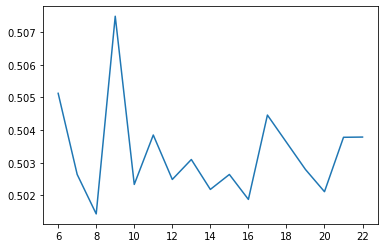

In [4]:
score = []
for i in range(22,5,-1):
	X_mutual = SelectKBest(score_func=mutual_info_classif, k=i).fit_transform(Xs, y)
	once = cross_val_score(model_rf_v2, X_mutual, y, cv=5,scoring=scorer)
	score.append(once.mean())
plt.plot(range(22,5,-1), score)
plt.show()  

In [12]:
X_mutual = SelectKBest(score_func=mutual_info_classif, k=17).fit_transform(Xs, y)
rfe = RFE(model_rf_v2, n_features_to_select=10)
rfe.fit(X_mutual, y)
X_RFE = rfe.transform(X_mutual)

In [13]:
all_feature_names = ["GC_Content","CAI","A","R","N","D","C","Q","E","G","H","I","L","K","M","F","P","S","T","W","Y","V"]
selector = SelectKBest(mutual_info_classif, k=10)
selector.fit(Xs,y)
# Get columns to keep and create new dataframe with those only
cols_idxs = selector.get_support(indices=True)
selected_features = [all_feature_names[i] for i in cols_idxs]
print(selected_features)

['A', 'R', 'N', 'Q', 'K', 'F', 'P', 'S', 'W', 'V']


In [14]:
selected_columns_rf = ['A', 'R', 'N', 'Q', 'K', 'F', 'P', 'S', 'W', 'V']
ba_score=cross_val_score(model_rf_v2, Xs[selected_columns_rf], y ,cv=5,scoring=scorer).mean()
print(ba_score)

0.5021807666269813


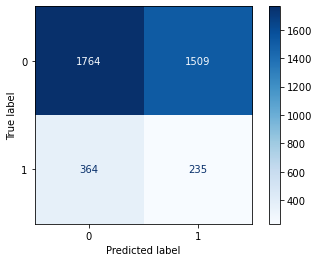

In [15]:
from sklearn.metrics import ConfusionMatrixDisplay
X_evl_test_rf = np.array(Xs[selected_columns_rf])
y_evl_test = np.array(y)
disp = ConfusionMatrixDisplay.from_estimator(model_rf_v2,X_evl_test_rf,y_evl_test,cmap=plt.cm.Blues)

In [12]:
model_rf = load('../../model/random_forest_model.joblib')

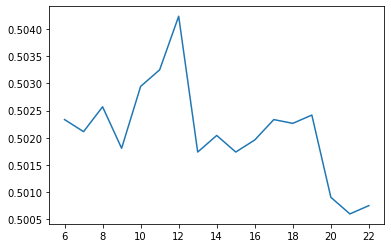

In [18]:
#remove high correlated features
score = []
for i in range(22,5,-1):
	X_mutual = SelectKBest(score_func=mutual_info_classif, k=i).fit_transform(Xs, y)
	once = cross_val_score(model_rf, X_mutual, y, cv=5,scoring=scorer)
	score.append(once.mean())
plt.plot(range(22,5,-1), score)
plt.show()              


In [13]:
# 10 features
X_mutual = SelectKBest(score_func=mutual_info_classif, k=12).fit_transform(Xs, y)
rfe = RFE(model_rf, n_features_to_select=8)
rfe.fit(X_mutual, y)
X_RFE = rfe.transform(X_mutual)

In [15]:
all_feature_names = ["GC_Content","CAI","A","R","N","D","C","Q","E","G","H","I","L","K","M","F","P","S","T","W","Y","V"]
selector = SelectKBest(mutual_info_classif, k=12)
selector.fit(Xs,y)
# Get columns to keep and create new dataframe with those only
cols_idxs = selector.get_support(indices=True)
selected_feature_indices = rfe.support_
selected_feature_names = cols_idxs[selected_feature_indices]
selected_features = [all_feature_names[i] for i in selected_feature_names]
print("Selected Features:")
print(selected_features)

Selected Features:
['A', 'C', 'Q', 'E', 'F', 'S', 'W', 'V']


In [14]:
ba_score=cross_val_score(model_rf, Xs, y ,cv=5,scoring=scorer).mean()
print(ba_score)

0.5007499358031609


In [16]:
selected_columns_rf=['A', 'C', 'Q', 'E', 'F', 'S', 'W', 'V']
ba_score=cross_val_score(model_rf, Xs[selected_columns_rf], y ,cv=5,scoring='accuracy').mean()
print(ba_score)

0.8440086688338753


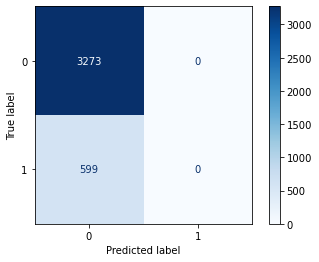

In [20]:
from sklearn.metrics import ConfusionMatrixDisplay
X_evl_test_rf = np.array(Xs[selected_columns_rf])
y_evl_test = np.array(y)
disp = ConfusionMatrixDisplay.from_estimator(model_rf,X_evl_test_rf,y_evl_test,cmap=plt.cm.Blues)

In [18]:
model_xgb=joblib.load('../../model/XGBoost_model.joblib')
ba_score=cross_val_score(model_xgb, Xs, y ,cv=5,scoring=scorer).mean()
print(ba_score)

0.5421721184446886


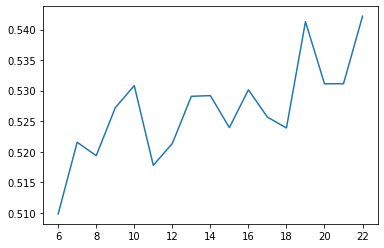

In [26]:
score = []
for i in range(22,5,-1):
	X_mutual = SelectKBest(score_func=mutual_info_classif, k=i).fit_transform(Xs, y)
	once = cross_val_score(model_xgb, X_mutual, y, cv=5,scoring=scorer)
	score.append(once.mean())
plt.plot(range(22,5,-1), score)
plt.show()              

In [19]:
X_mutual = SelectKBest(score_func=mutual_info_classif, k=20).fit_transform(Xs, y)
rfe = RFE(model_rf, n_features_to_select=19)
rfe.fit(X_mutual, y)
X_RFE = rfe.transform(X_mutual)

In [21]:
selector = SelectKBest(mutual_info_classif, k=20)
selector.fit(Xs,y)
# Get columns to keep and create new dataframe with those only
cols_idxs = selector.get_support(indices=True)
selected_feature_indices = rfe.support_
selected_feature_names = cols_idxs[selected_feature_indices]
selected_features = [all_feature_names[i] for i in selected_feature_names]
print("Selected Features:")
print(selected_features)

Selected Features:
['GC_Content', 'CAI', 'A', 'R', 'Q', 'E', 'G', 'H', 'I', 'L', 'K', 'M', 'F', 'P', 'S', 'T', 'W', 'Y', 'V']


In [21]:
selected_columns_xgb=['GC_Content', 'CAI', 'A', 'R', 'Q', 'E', 'G', 'H', 'I', 'L', 'K', 'M', 'F', 'P', 'S', 'T', 'W', 'Y', 'V']
ba_score=cross_val_score(model_xgb, X_RFE, y ,cv=5,scoring=scorer).mean()
print(ba_score)

0.5373227534588315


In [22]:
Wrapper_score = cross_val_score(model_xgb,Xs[selected_columns_xgb],y,cv=5,scoring='accuracy').mean()
print(Wrapper_score)

0.8233445027923647


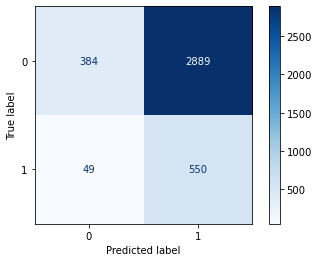

In [23]:
X_evl_test_xgb = np.array(Xs[selected_columns_xgb])

disp_xgb = ConfusionMatrixDisplay.from_estimator(model_xgb,X_evl_test_xgb,y_evl_test,cmap=plt.cm.Blues)

In [24]:
from sklearn.neural_network import MLPClassifier
model_mlp = joblib.load('../../model/MLP_model.joblib')

In [4]:
ba_score = cross_val_score(model_mlp, Xs, y, cv=5,scoring=scorer)
print(ba_score.mean())

0.4998473282442748


In [25]:
selector = SelectKBest(score_func=mutual_info_classif, k=21)
all_feature_names = ["GC_Content","CAI","A","R","N","D","C","Q","E","G","H","I","L","K","M","F","P","S","T","W","Y","V"]
X_mutual=selector.fit_transform(Xs, y)
cols_idxs = selector.get_support(indices=True)
selected_features = [all_feature_names[i] for i in cols_idxs]
print(selected_features)

['GC_Content', 'CAI', 'A', 'R', 'N', 'D', 'C', 'Q', 'E', 'G', 'I', 'L', 'K', 'M', 'F', 'P', 'S', 'T', 'W', 'Y', 'V']


In [26]:
selected_columns_mlp = ['GC_Content', 'CAI', 'A', 'R', 'N', 'D', 'C', 'Q', 'E', 'G', 'I', 'L', 'K', 'M', 'F', 'P', 'S', 'T', 'W', 'Y', 'V']
Wrapper_score = cross_val_score(model_mlp,Xs[selected_columns_mlp],y,cv=5,scoring=scorer).mean()
print(Wrapper_score)

0.5036316720819569


In [27]:
Wrapper_score = cross_val_score(model_mlp,Xs[selected_columns_mlp],y,cv=5,scoring='accuracy').mean()
print(Wrapper_score)

0.842198883054097


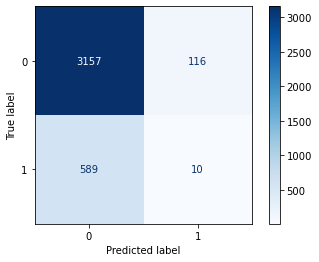

In [28]:
from sklearn.metrics import ConfusionMatrixDisplay
X_evl_test_mlp = np.array(Xs[selected_columns_mlp])
y_evl_test = np.array(y)
disp_mlp = ConfusionMatrixDisplay.from_estimator(model_mlp,X_evl_test_mlp,y_evl_test,cmap=plt.cm.Blues)

In [29]:
from scipy.stats import ks_2samp

selected_columns_mlp = ['GC_Content', 'CAI', 'A', 'R', 'D', 'C', 'Q', 'E', 'G', 'H', 'I', 'L', 'K', 'M', 'F', 'P', 'S', 'T', 'W', 'Y', 'V']
model_rf_prediction = model_rf.predict(Xs[selected_columns_rf])
model_xgb_prediction = model_xgb.predict(Xs[selected_columns_xgb])
model_mlp_prediction = model_mlp.predict(Xs[selected_columns_mlp])

statistic_xgb_rf, p_value_xgb_rf = ks_2samp(model_xgb_prediction, model_rf_prediction)
statistic_mlp_rf, p_value_mlp_rf = ks_2samp(model_mlp_prediction, model_rf_prediction)
statistic_xgb_mlp, p_value_xgb_mlp, = ks_2samp(model_xgb_prediction, model_mlp_prediction)

if p_value_xgb_rf < 0.05:
    print("Reject the null hypothesis: The distributions of xgboost and random forest are different.")
else:
    print("Fail to reject the null hypothesis: The distributions of xgboost and random forest are the same.")

if p_value_mlp_rf < 0.05:
    print("Reject the null hypothesis: The distributions of MLP and random forest are different.")
else:
    print("Fail to reject the null hypothesis: The distributions of MLP and random forest are the same.")
    
if p_value_xgb_mlp < 0.05:
    print("Reject the null hypothesis: The distributions of xgboost and MLP are different.")
else:
    print("Fail to reject the null hypothesis: The distributions of xgboost and MLP are the same.")

Reject the null hypothesis: The distributions of xgboost and random forest are different.
Reject the null hypothesis: The distributions of MLP and random forest are different.
Reject the null hypothesis: The distributions of xgboost and MLP are different.


D:\anaconda3\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


In [39]:
print(p_value_xgb_mlp,p_value_xgb_rf,p_value_mlp_rf)

4.653639073033953e-20 2.78936112692352e-91 5.860640213862523e-198


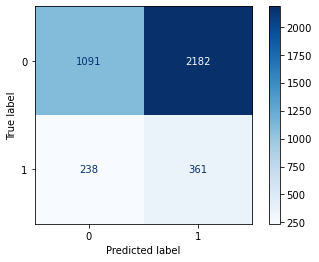

In [40]:
from sklearn.metrics import ConfusionMatrixDisplay
X_evl_test_rf = np.array(Xs[selected_columns_rf])
y_evl_test = np.array(y)
disp = ConfusionMatrixDisplay.from_estimator(model_rf,X_evl_test_rf,y_evl_test,cmap=plt.cm.Blues)

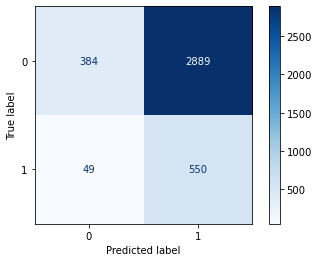

In [41]:
X_evl_test_xgb = np.array(Xs[selected_columns_xgb])

disp_xgb = ConfusionMatrixDisplay.from_estimator(model_xgb,X_evl_test_xgb,y_evl_test,cmap=plt.cm.Blues)

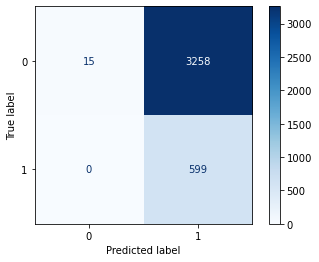

In [42]:
X_evl_test_mlp = np.array(Xs[selected_columns_mlp])

disp_mlp = ConfusionMatrixDisplay.from_estimator(model_mlp,X_evl_test_mlp,y_evl_test,cmap=plt.cm.Blues)

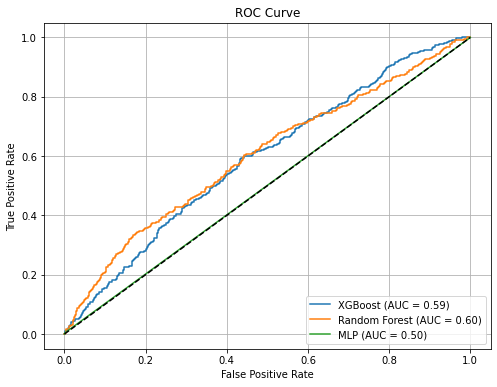

In [49]:
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_xgb = model_xgb.predict_proba(X_evl_test_xgb)[:, 1]  
y_pred_rf = model_rf.predict_proba(X_evl_test_rf)[:, 1]
y_pred_mlp = model_mlp.predict(X_evl_test_mlp)

# 计算 ROC 曲线的参数
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_evl_test, y_pred_xgb)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_evl_test, y_pred_rf)
fpr_mlp, tpr_mlp, thresholds_mlp = roc_curve(y_evl_test, y_pred_mlp)

# 计算 AUC 值
auc_xgb = roc_auc_score(y_evl_test, y_pred_xgb)
auc_rf = roc_auc_score(y_evl_test, y_pred_rf)
auc_mlp = roc_auc_score(y_evl_test, y_pred_mlp)

# 绘制 ROC 曲线
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost (AUC = %0.2f)' % auc_xgb)
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = %0.2f)' % auc_rf)
plt.plot(fpr_mlp, tpr_mlp, label='MLP (AUC = %0.2f)' % auc_mlp)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()